In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def draw(lines):
    maxc = max(x for x,y in lines)
    maxr = max(y for x,y in lines)
    paper = np.zeros((maxr+1, maxc+1))
    for line in lines:
        c, r = line
        paper[r][c] = 1
    plt.imshow(paper)
    return paper

def fold(lines, fold):
    axis, border = fold
    for i, (c,r) in enumerate(lines):
        if axis == 'x':
            lines[i] = (border - abs(c-border), r)
        else:
            lines[i] = (c, border - abs(r-border))
    return lines



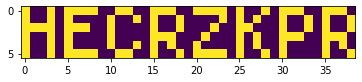

In [49]:
lines, fold_ins = open('input.txt').read().split('\n\n')
lines = [list(map(int, line.split(','))) for line in lines.split('\n')]
folds = []
for i in fold_ins.split('\n'):
    _, _, fold_ins = i.split()
    dim, num = fold_ins.split('=')
    num = int(num)
    folds.append((dim, num))

for f in folds:
    lines = fold(lines, f)          

paper = draw(lines)

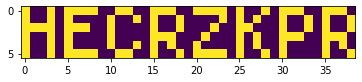

In [50]:
lines = []
for line in open('input.txt', 'r'):
    line = line.strip()
    if line.startswith('fold'):
        fold_ins = line.split()[-1]
        dim, num = fold_ins.split('=')
        num = int(num)
        lines = fold(lines, (dim,num))
    else:
        if line:
            lines.append([int(x) for x in line.strip().split(',')])

paper = draw(lines)